In [1]:
import pandas as pd

filename = 'Sales_Transactions_Dataset_Weekly.csv'
#columns = lambda name: name == 'Product_Code' or name.find('Normalized') != -1
columns = lambda name: name == 'Normalized 1' or name == 'Normalized 3'
data = pd.read_csv(filepath_or_buffer=filename, usecols=columns)

In [2]:
print(data)

     Normalized 1  Normalized 3
0            0.50          0.28
1            0.60          0.20
2            0.73          0.55
3            0.35          0.18
4            0.13          0.53
..            ...           ...
806          0.00          0.00
807          0.14          0.00
808          0.00          0.00
809          0.00          0.50
810          0.33          0.00

[811 rows x 2 columns]


In [3]:
from sklearn.cluster import KMeans

def assign_clusters(data, num_clusters=5, use_kmeans_pp=True):
    if num_clusters > 10:
        num_clusters = 10
    if num_clusters <= 0:
        raise ValueError('Clusters must be > 0')

    initAlgorithm = 'k-means++' if use_kmeans_pp else 'random'
    result_fit = KMeans(n_clusters=num_clusters, init=initAlgorithm).fit(data)
    dataCopy = data.copy()
    dataCopy['class'] = list(result_fit.labels_)
    return dataCopy, result_fit.cluster_centers_

In [4]:
num_clusters = 5
clusters_kmeans_pp, clusters_kmeans_pp_centers = assign_clusters(data, num_clusters=num_clusters, use_kmeans_pp=True)
clusters_kmeans, clusters_kmeans_centers = assign_clusters(data, num_clusters=num_clusters, use_kmeans_pp=False)

In [5]:
print(clusters_kmeans['class'][0])

3


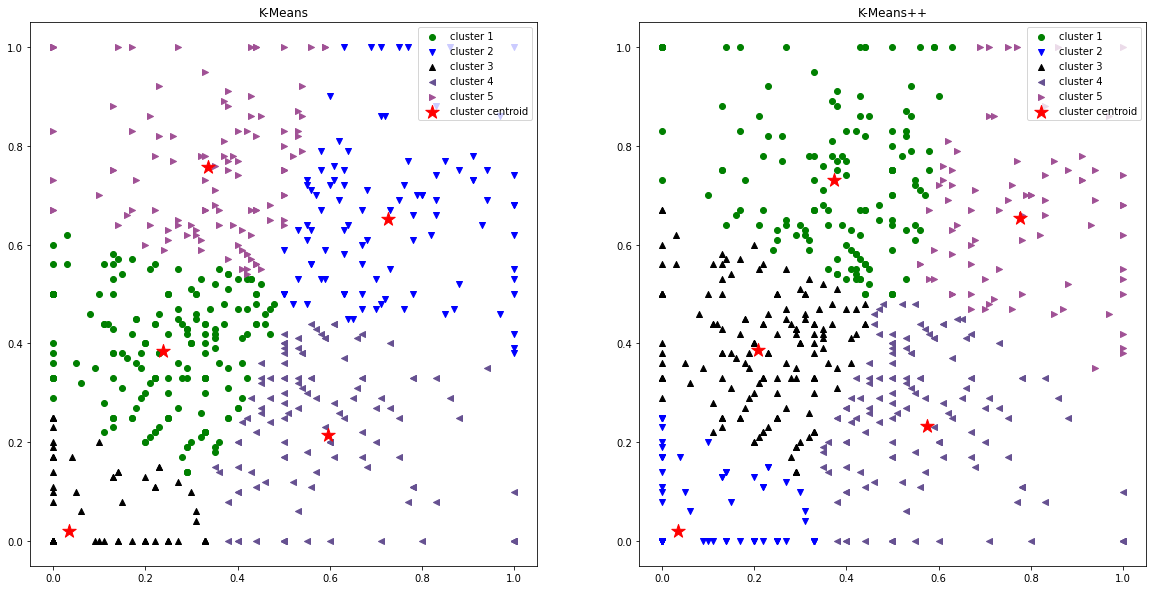

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def plotClasses(ax, data, centers):
    colorList = [
        'green',
        'blue',
        'black',
        '#665191',
        '#a05195',
        '#d45087',
        '#f95d6a',
        '#ff7c43',
        '#ffa600',
        '#00abcd',
    ]
    symbolList = [
        'o', 'v', '^', '<', '>', '8', 's', 'p', 'h', 'H', 'D', 'd', 'P', 'X'
    ]
    global num_clusters
    for i in range(num_clusters):
        pred = data['class'] == i
        legend = 'cluster {}'.format(i+1)
        ax.scatter(data[data.columns[0]][pred], data[data.columns[1]][pred], c=colorList[i], marker=symbolList[i], label=legend)
        legend = 'cluster centroid' if i==(num_clusters-1) else None#only last is labeled for pretty list
        ax.scatter(centers[i][0], centers[i][1], c='red', marker='*', s=200, label=legend)
    ax.legend()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('K-Means')
plotClasses(ax1, clusters_kmeans, clusters_kmeans_centers)
ax2.set_title('K-Means++')
plotClasses(ax2, clusters_kmeans_pp, clusters_kmeans_pp_centers)

plt.rcParams["figure.figsize"]=20,10
plt.show()